___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x:"%.3f" % x)

pd.set_option("display.max_column", None)

In [3]:

# import tensorflow as tf

# tf.config.list_physical_devices("GPU")

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [4]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [6]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

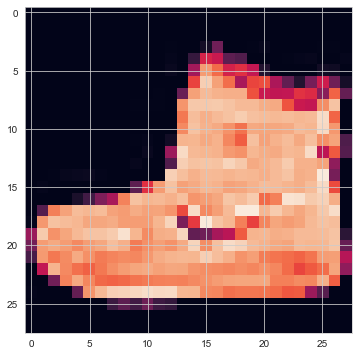

In [7]:
plt.imshow(X_train[0])

In [8]:
y_train[0]

9

In [9]:
X_train[5].shape

(28, 28)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [10]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [11]:
classes[y_train[0]]

'Ankle boot'

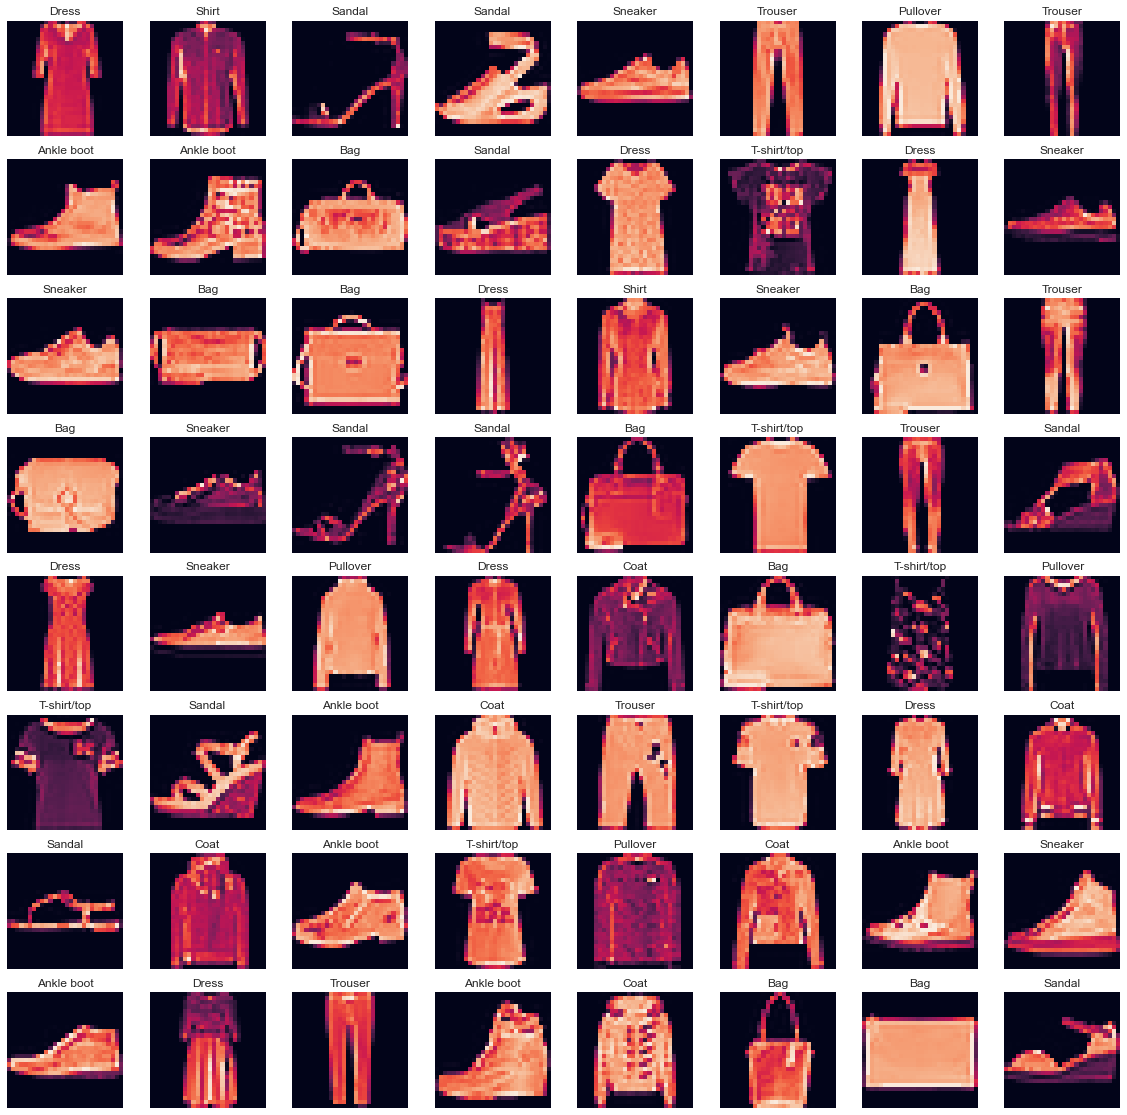

In [12]:
plt.figure(figsize=(20,20))
for i in range(64):
  rand_index = int(np.random.randint(low=0, high=60000, size=1)) 
  plt.subplot(8,8,i+1)
  plt.axis("off")
  plt.title(classes[int(y_train[rand_index])])
  plt.imshow(X_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [13]:
X_train[0].min()

0

In [14]:
X_train[0].max()

255

In [15]:
# Normalize image pixels

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train /= 255
X_test /= 255

In [16]:
X_train[0].min()

0.0

In [17]:
X_train[0].max()

1.0

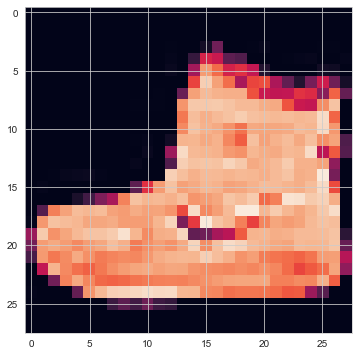

In [18]:
plt.imshow(X_train[0])

In [19]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [20]:
pd.DataFrame(y_train).value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [21]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [22]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [23]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [24]:
from tensorflow.keras.utils import to_categorical

In [25]:
# gözlem hangi kategoride ise o indexteki değeri 1 diğerlerini 0 yapar.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [26]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [28]:
model = Sequential()
model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28,28,1), activation="relu"))
model.add(MaxPool2D(pool_size = (2, 2), strides = (1,1)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 17500)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2240128   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 2,241,698
Trainable params: 2,241,698
Non-trainable params: 0
_________________________________________________________________


##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
earlystop = EarlyStopping(monitor="val_accuracy", mode="max", patience=2, restore_best_weights=True)

In [32]:
model.fit(X_train, y_train, 
          batch_size=64, 
          epochs=10, 
          validation_data=[X_test, y_test],
          callbacks=[earlystop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.3959 - acc: 0.8611 - val_loss: 0.3765 - val_acc: 0.8538
Epoch 2/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2523 - acc: 0.9094 - val_loss: 0.2755 - val_acc: 0.8970
Epoch 3/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2075 - acc: 0.9236 - val_loss: 0.3113 - val_acc: 0.8978
Epoch 4/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.1774 - acc: 0.9365 - val_loss: 0.2704 - val_acc: 0.9075
Epoch 5/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.1519 - acc: 0.9459 - val_loss: 0.2835 - val_acc: 0.9075
Epoch 6/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.1321 - acc: 0.9527 - val_loss: 0.2979 - val_acc: 0.9024
Epoch 7/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.1166 - acc: 0.9581 - val_loss: 0

**TASK 7: Plot values of metrics you used in your model.**

In [33]:
summary = pd.DataFrame(model.history.history)
summary

,loss,acc,val_loss,val_acc
0,0.396,0.861,0.377,0.854
1,0.252,0.909,0.276,0.897
2,0.208,0.924,0.311,0.898
3,0.177,0.937,0.270,0.908
4,0.152,0.946,0.284,0.908
5,0.132,0.953,0.298,0.902
6,0.117,0.958,0.296,0.911
7,0.102,0.963,0.314,0.909
8,0.090,0.968,0.318,0.917
9,0.078,0.973,0.351,0.914


<AxesSubplot:>

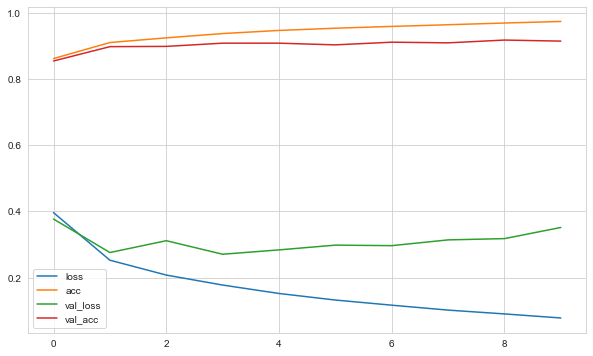

In [34]:
summary.plot()

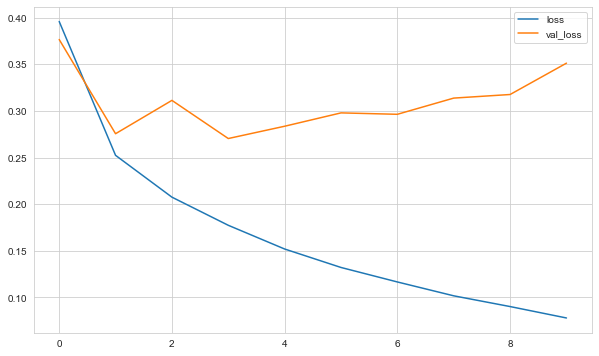

In [35]:
summary[["loss", "val_loss"]].plot();

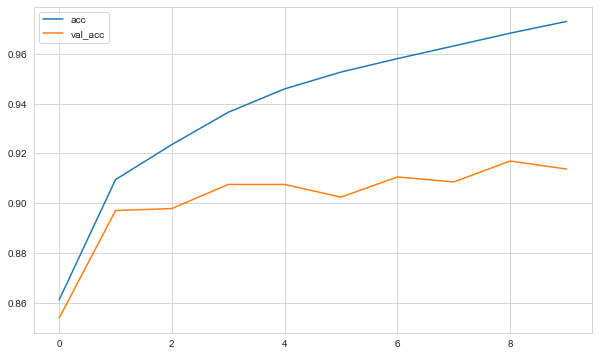

In [37]:
summary[["acc", "val_acc"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
score = model.evaluate(X_test, y_test)
print("Test loss : ", score[0])
print("Test accuracy", score[1])


10000/10000 [==============================] - 1s 63us/sample - loss: 0.3512 - acc: 0.9137
Test loss :  0.3511723563209176
Test accuracy 0.91370004


In [40]:
pred_proba = model.predict(X_test)
pred_proba

array([[1.9922936e-07, 3.1125276e-16, 2.2465827e-09, ..., 2.1745240e-05,
        5.8424190e-09, 9.9996650e-01],
       [3.6992105e-13, 9.9979362e-26, 1.0000000e+00, ..., 1.3531689e-24,
        8.6307678e-21, 7.4884357e-20],
       [1.8619241e-14, 1.0000000e+00, 3.5963563e-18, ..., 1.5168492e-23,
        2.0811622e-16, 9.8159338e-22],
       ...,
       [9.1333970e-14, 5.2623308e-23, 6.1956557e-14, ..., 8.2956759e-13,
        1.0000000e+00, 4.1549683e-18],
       [1.1054071e-12, 1.0000000e+00, 1.6215583e-14, ..., 3.0744701e-19,
        6.3437410e-16, 1.2984481e-17],
       [2.6780942e-06, 3.5380573e-08, 1.7484969e-04, ..., 2.1963775e-02,
        5.7739409e-05, 8.6769760e-05]], dtype=float32)

In [41]:
pred_proba.shape

(10000, 10)

In [42]:
pred_proba[0]

array([1.9922936e-07, 3.1125276e-16, 2.2465827e-09, 7.8424595e-15,
       2.0351096e-10, 1.0840877e-05, 6.4802111e-07, 2.1745240e-05,
       5.8424190e-09, 9.9996650e-01], dtype=float32)

In [43]:
np.argmax(pred_proba[0])

9

In [44]:
y_pred = np.argmax(pred_proba, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [45]:
y_pred.shape

(10000,)

In [46]:
y_test_arg=np.argmax(y_test,axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, y_pred))

Confusion Matrix
[[896   0  17  14   4   2  65   0   2   0]
 [  2 973   1  18   0   1   4   0   1   0]
 [ 24   0 872   8  29   0  67   0   0   0]
 [ 25   0   8 929  13   0  24   0   1   0]
 [  3   0  73  31 827   1  65   0   0   0]
 [  0   0   0   0   0 988   0   9   0   3]
 [136   1  45  27  38   0 748   0   5   0]
 [  0   0   0   0   0  13   0 977   1   9]
 [  7   1   1   4   3   4   4   1 974   1]
 [  0   0   0   0   0   6   1  38   2 953]]


<AxesSubplot:>

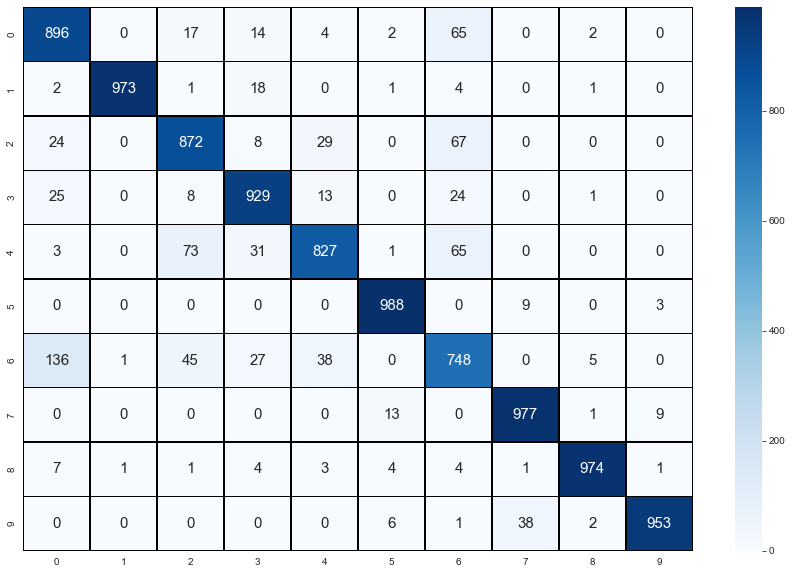

In [47]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test_arg, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

In [48]:
print(classification_report(y_test_arg, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1000
           1       1.00      0.97      0.99      1000
           2       0.86      0.87      0.86      1000
           3       0.90      0.93      0.91      1000
           4       0.90      0.83      0.86      1000
           5       0.97      0.99      0.98      1000
           6       0.76      0.75      0.76      1000
           7       0.95      0.98      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.99      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [49]:
(y_test_arg != y_pred).sum()

863

## Prediction

In [50]:
my_clothes = X_test[3]

In [51]:
my_clothes.shape

(28, 28, 1)

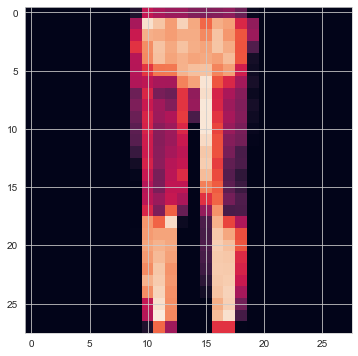

In [52]:
plt.imshow(my_clothes.reshape(28,28))

In [53]:
pred_proba = model.predict(my_clothes.reshape(1,28,28,1))
pred_proba

array([[1.9147039e-13, 1.0000000e+00, 2.0611240e-16, 8.8368523e-12,
        4.7570831e-14, 1.5135796e-19, 2.4985707e-14, 8.1306471e-20,
        2.4752958e-15, 1.6243093e-18]], dtype=float32)

In [54]:
y_pred = np.argmax(pred_proba)
y_pred

1

In [55]:
model.save("cnn_clothes_classification.h5")

In [56]:
model = tf.keras.models.load_model("cnn_clothes_classification.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [57]:
pred = model.predict(np.expand_dims(X_test[24], axis=0))

In [58]:
np.argmax(pred)

1

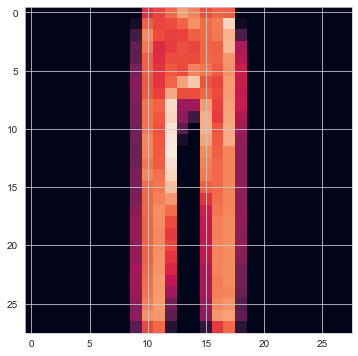

In [59]:
plt.imshow(X_test[24].reshape(28,28))

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___